In [ ]:
#Import relevant libraries
import scipy.io
import numpy as np
import mne, glob
from scipy.io import loadmat
import matplotlib.pyplot as plt


In [10]:
#load mat lab files
#https://www.mamem.eu/results/datasets/

matfiles = glob.glob("D:/Second Semester - Big Files/BCI/Week 13/2068677/*.mat")
data = {}
matfiles

#ss01a = scipy.io.loadmat("D:/Second Semester - Big Files/BCI/Week 13/2068677/EEG-SSVEP-Part1/EEG-SSVEP-Part1/S001a.mat")
#ss01b = scipy.io.loadmat("D:/Second Semester - Big Files/BCI/Week 13/2068677/EEG-SSVEP-Part1/EEG-SSVEP-Part1/S001b.mat")

['D:/Second Semester - Big Files/BCI/Week 13/2068677\\S001a.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S001b.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S001c.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S002a.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S002b.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S002c.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S002d.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S002e.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S003a.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S003b.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S003c.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S004a.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S004b.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S004c.mat',
 'D:/Second Semester - Big Files/BCI/Week 13/2068677\\S004d.mat',
 'D:/Secon

In [16]:
dat = loadmat(matfiles[0])

In [20]:
#Explore the .mat file
dat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jan 14 13:28:16 2016',
 '__version__': '1.0',
 '__globals__': [],
 'DIN_1': array([[array(['D254'], dtype='<U4'), array(['D255'], dtype='<U4'),
         array(['D254'], dtype='<U4'), ..., array(['D255'], dtype='<U4'),
         array(['D254'], dtype='<U4'), array(['D255'], dtype='<U4')],
        [array([[100957]]), array([[101019]]), array([[101090]]), ...,
         array([[465728]]), array([[465766]]), array([[465811]])],
        [array([[1]], dtype=uint8), array([[1]], dtype=uint8),
         array([[1]], dtype=uint8), ..., array([[1]], dtype=uint8),
         array([[1]], dtype=uint8), array([[1]], dtype=uint8)],
        [array([[25239]], dtype=uint16), array([[25254]], dtype=uint16),
         array([[25272]], dtype=uint16), ..., array([[116432]]),
         array([[116441]]), array([[116452]])]], dtype=object),
 'age': array(['24'], dtype='<U2'),
 'capsize': array(['Adult Medium'], dtype='<U12'),
 'eeg': array([[ -

In [83]:
#Explore the EEG variable in the .mat files
dat['eeg']

array([[ -3911.87890625,  -3903.75195312,  -3881.5625    , ...,
         -3114.23999023,  -3113.31103516,  -3115.44262695],
       [ -8640.99511719,  -8643.203125  ,  -8622.69921875, ...,
         -6968.36865234,  -6955.33154297,  -6957.94775391],
       [-10022.35546875, -10021.11328125, -10003.5390625 , ...,
         -8732.66992188,  -8719.56542969,  -8726.81054688],
       ...,
       [ -9369.57714844,  -9376.62011719,  -9338.21875   , ...,
         -9669.8828125 ,  -9672.19921875,  -9676.36328125],
       [-10179.93554688, -10188.48925781, -10154.73632812, ...,
        -11368.16699219, -11372.89746094, -11380.37402344],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

In [35]:
len(dat['eeg']), len(dat['eeg'].T)

(257, 117917)

In [98]:
eeg = dat['eeg'].T
eeg.shape

(117917, 257)

In [76]:
# Last column is zeros, not needed:

eeg = np.delete(eeg,-1, axis = 1)
eeg[:1000,-1]

array([-10179.93554688, -10188.48925781, -10154.73632812, -10148.08007812,
       -10172.23730469, -10180.2265625 , -10187.12304688, -10163.65625   ,
       -10146.06933594, -10163.1953125 , -10188.82519531, -10168.36035156,
       -10159.36523438, -10151.54980469, -10188.05175781, -10201.18261719,
       -10187.62402344, -10180.34765625, -10182.52832031, -10182.859375  ,
       -10187.97460938, -10173.76855469, -10161.34472656, -10154.43164062,
       -10175.36035156, -10186.95410156, -10191.92285156, -10166.18261719,
       -10165.35742188, -10185.77832031, -10190.74121094, -10173.02050781,
       -10173.35058594, -10169.19335938, -10181.01367188, -10200.61425781,
       -10176.90625   , -10178.61816406, -10169.796875  , -10188.43847656,
       -10194.75683594, -10180.53808594, -10154.0859375 , -10154.71386719,
       -10180.85742188, -10181.64355469, -10172.67871094, -10164.74707031,
       -10153.66308594, -10184.71582031, -10205.51660156, -10188.40722656,
       -10177.74902344, -

In [82]:
# Create an array with the names of the channels (in case needed)
channel_names = []*(len(eeg.T)+1)

for a in range(len(eeg.T)):
    channel_names.append(str(a+1))

channel_names

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

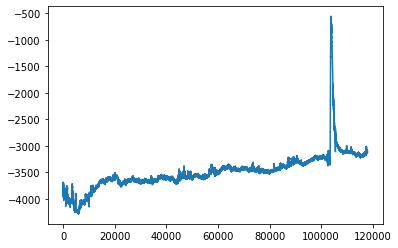

In [53]:
import matplotlib.pyplot as plt

x = eeg[:,0:1]
plt.plot(eeg[:,0:1])

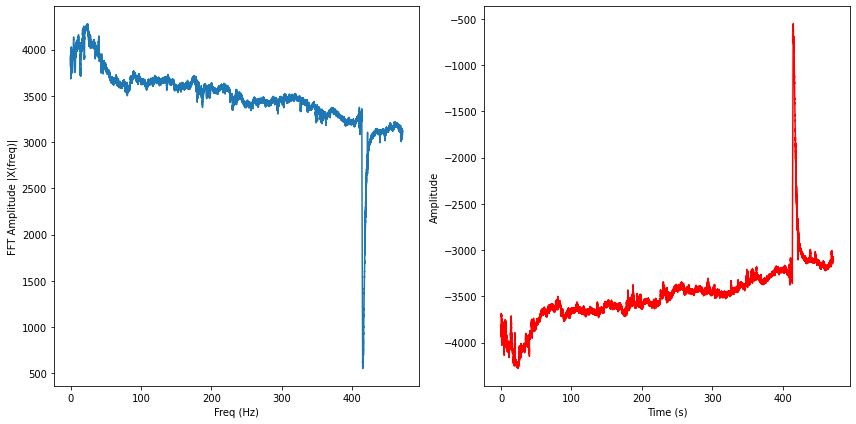

In [54]:
'''
#FFT

from scipy.fftpack import fft, ifft

sr = 250 # sampling interval
ts = 1.0/sr
t = np.arange(0,len(x)/sr,ts)

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(t, np.abs(X))
#plt.stem(t, np.abs(X), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t,ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

'''

In [70]:
# Just in case i need them:

HCGSN_256_equivalent = {"F7": 47, "Fp1": 37, "F3": 36, "F8": 2, "Pz":101, "Oz":126, "T7": 69, "P7": 96, "LM": 94, "T8": 202, "Fz":21, "C4": 183, "P8":170,
                        "O2":160, "F4": 224, "RM":190, "NAS":31, "FP2": 18, "O1": 116}

channel_names_10_20 = ["Fp1", "AF3","F7","F3","FC1","FC5","T7","C3","CP1","CP5","P7","P3","Pz", 
              "PO3", "O1","Oz","O2","PO4","P4","P8","P6","CP2","C4", "T8","FC6","FC2",
              "F4",  "F8","AF4","Fp2","Fz","Cz"] 

In [115]:
summarized_channels = []*19
new_eeg = []*19

for i in range(1,len(eeg[1])):   #iterate over the 256 columns
    if i == 47 or i == 37 or i == 36 or i == 2 or i ==101 or i ==126 or i==69 or i==96 or i==94 or i==202 or i== 21 or i==183 or i==170 or i==160 or i==224 or i==190 or i==31 or i==18 or i==116:
        summarized_channels.append(i)
        new_eeg.append(eeg[:,i])

summarized_channels
new_eeg

[array([-10022.35546875, -10021.11328125, -10003.5390625 , ...,
         -8732.66992188,  -8719.56542969,  -8726.81054688]),
 array([-12185.54785156, -12180.54980469, -12161.88476562, ...,
         -9961.04394531,  -9956.60253906,  -9967.05273438]),
 array([-8480.05273438, -8479.51953125, -8467.20996094, ...,
        -8240.34863281, -8241.05273438, -8248.79589844]),
 array([-17190.8515625 , -17190.46289062, -17165.31640625, ...,
        -15961.76953125, -15966.09375   , -15972.23925781]),
 array([-13848.51953125, -13848.43457031, -13823.74023438, ...,
        -13081.38378906, -13094.53125   , -13100.57519531]),
 array([-15795.30761719, -15790.52636719, -15766.08691406, ...,
        -15944.61914062, -15951.83496094, -15966.91601562]),
 array([-8312.12988281, -8301.51757812, -8302.96386719, ...,
        -8176.68896484, -8186.98095703, -8201.12304688]),
 array([-1505.68896484, -1485.06164551, -1465.84997559, ...,
        -2290.96411133, -2305.97363281, -2328.63134766]),
 array([ 690.45971

In [117]:
s_freq = 250 #sampling frequency
n_channels = len(summarized_channels)

info = mne.create_info(n_channels, sfreq = s_freq, ch_types = ['eeg']*n_channels)

#info.set_montage('standard_1020')
print('Event created :', info)

Event created : <Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>


Creating RawArray with float64 data, n_channels=19, n_times=117917
    Range : 0 ... 117916 =      0.000 ...   471.664 secs
Ready.


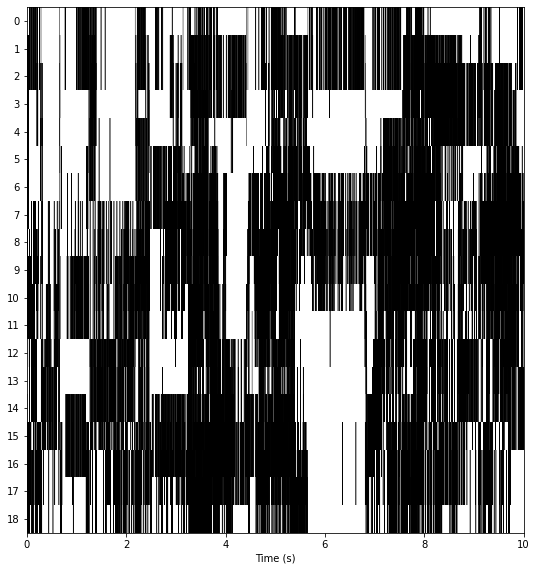

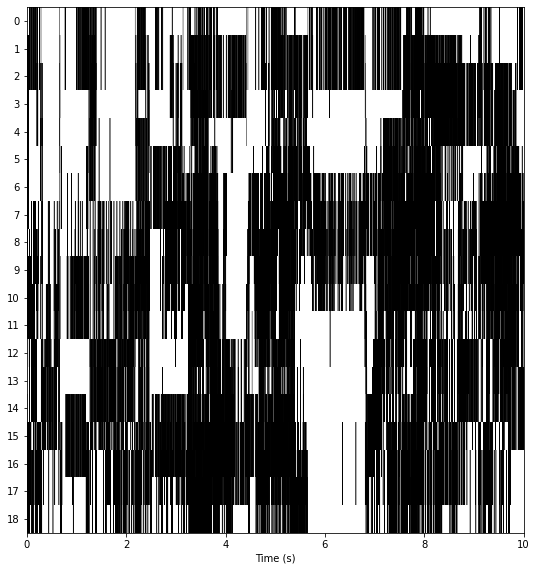

In [132]:
#Create "RAW" object:
raw = mne.io.RawArray(new_eeg, info)
raw.plot(show_scrollbars = False, show_scalebars = False)